# Sampling a signal with given Spectrum

In [2]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

import cmath
from scipy.fftpack import fft, ifft, fftfreq, fftshift

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx[0]],idx[0]

Running Python: 3.8.19
Running Sympy: 1.12.1


## Flat Spectrum - Set Parameters 

In [3]:
fs = 44100
N = 4096; print('N = '+str(N))
T = N/fs
t = np.arange(N)*T/N
delta_freq = fs/N

N = 4096


In [4]:
# bounds of rect in Y(f)
f_low = 1000
f_high = 4000
# find equivalent positions in Y(f) 
n_low = int(f_low/delta_freq)
n_high = int(f_high/delta_freq)
L1 = np.arange(n_low,n_high)

## Create Y(f) and y[n]

In [5]:
Y_bl = np.zeros((N,), dtype=complex)
# create random phase needed for correct ifft process
rng = np.random.default_rng()
phi = rng.uniform(0, 2*np.pi, (len(L1),))

# create Y(f)
mag_temp = np.ones([1,n_high-n_low])
    
Y_bl[L1] = mag_temp*np.exp(1j*phi)
# add complex conjugate at upper end to ensure that y[n] real
Y_bl[N-L1] = np.conj(Y_bl[L1])

# create y[n]
y_bl = ifft(Y_bl)

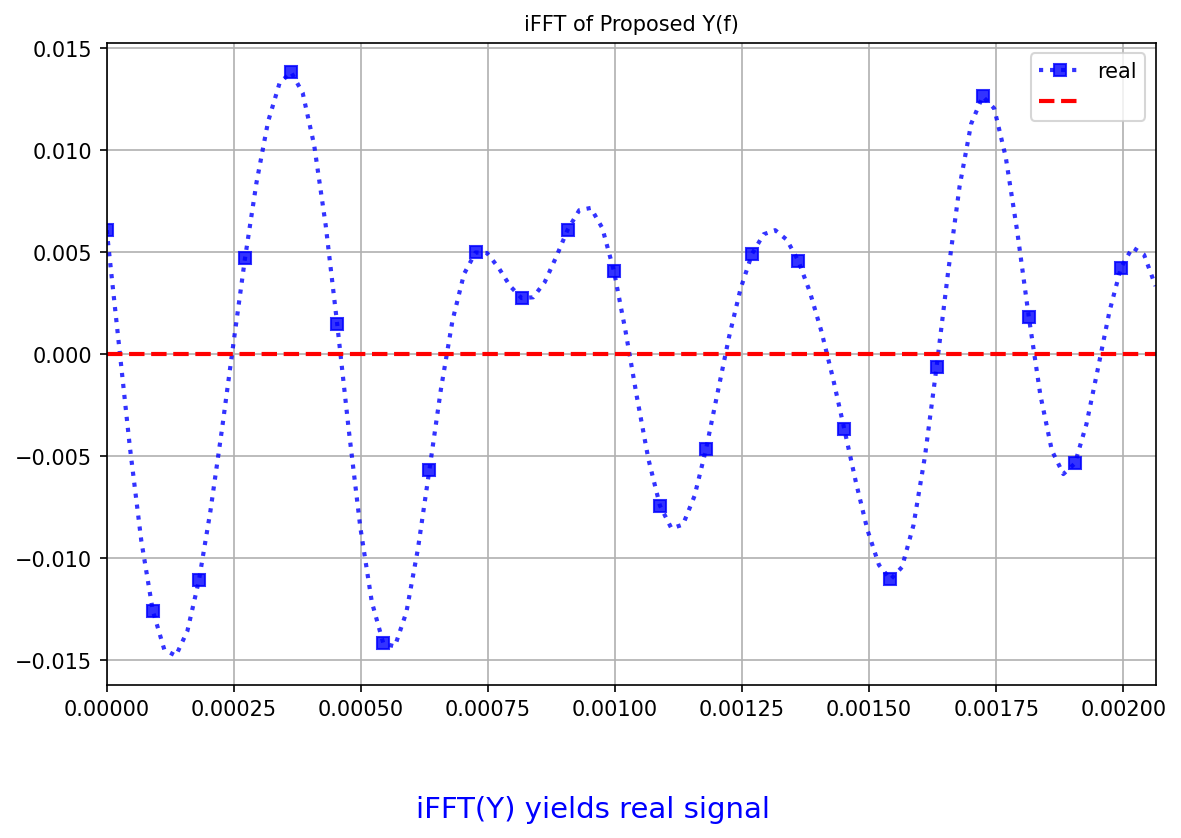

In [6]:
# check that it is real
fig = plt.figure(figsize=(8,5), dpi=150)
plt.plot(t[0:n_low], y_bl.real[0:n_low], 'bs:', alpha=0.8,markevery=4)
plt.plot(t[0:n_low], y_bl.imag[0:n_low], 'r--')
plt.legend(('real', '', 'imaginary'))
plt.title('iFFT of Proposed Y(f)')
caption("iFFT(Y) yields real signal",fig)
plt.show()

## FFT the created data to confirm spectrum is right

In [7]:
Y_bl_fft = fft(y_bl)
f_bl = fftfreq(N, 1/fs)

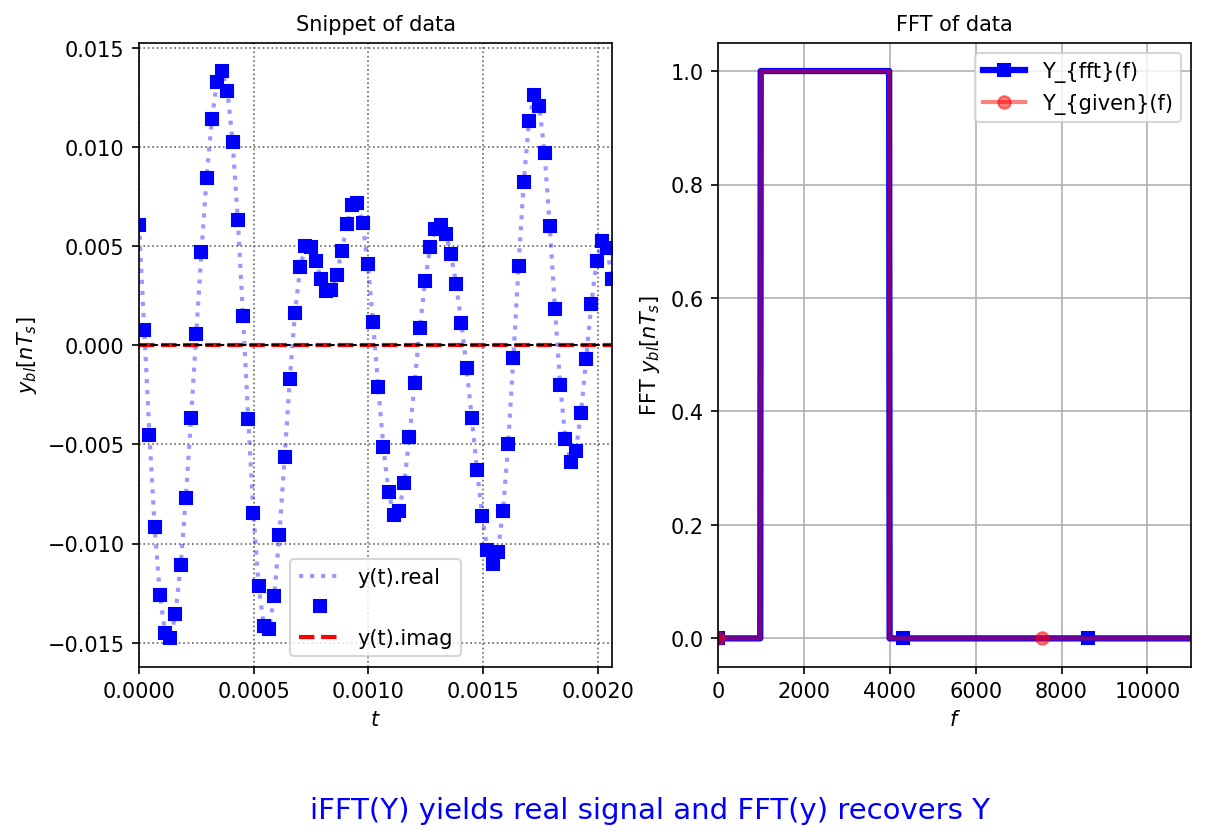

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=150)
fig.tight_layout(pad=2)
ax1.plot(t[0:n_low], y_bl.real[0:n_low], 'b:', alpha=0.4)
ax1.plot(t[0:n_low], y_bl.real[0:n_low], 'bs')
ax1.plot(t[0:n_low], y_bl.imag[0:n_low], 'r--')
ax1.set_ylabel('$y_{bl}[nT_s]$')
ax1.set_xlabel('$t$')
ax1.legend(['y(t).real',' ','y(t).imag'])
ax1.set_title('Snippet of data')
nicegrid(ax1)

ax2.plot(f_bl[0:N//2], np.abs(Y_bl_fft[0:N//2]),'bs-',lw=3,markevery=400)
ax2.plot(f_bl[0:N//2], np.abs(Y_bl[0:N//2]),'ro-',alpha=0.5,markevery=700)
ax2.set_ylabel('FFT $y_{bl}[nT_s]$')
ax2.set_xlabel('$f$')
ax2.set_xlim([0, fs/4])
ax2.legend(['Y_{fft}(f)','Y_{given}(f)'])
ax2.set_title('FFT of data')
caption("iFFT(Y) yields real signal and FFT(y) recovers Y",fig)
plt.show()